In [1]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import numpy as np

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings
from pandas.plotting import parallel_coordinates

pd.options.display.float_format = '{:,.1f}'.format

from statsmodels.graphics.mosaicplot import mosaic




In [2]:
# define the dataset location
filename = 'adult-all.csv'
# load the csv file as a data frame
dataframe = pd.read_csv(filename, header=None, na_values='?')
dataframe.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']

dataframe = dataframe.dropna() # drop rows with missing


# dataframe['workclass'] = dataframe['workclass'].astype('category').cat.codes
# dataframe['education'] = dataframe['education'].astype('category').cat.codes
# dataframe['marital-status'] = dataframe['marital-status'].astype('category').cat.codes
# dataframe['occupation'] = dataframe['occupation'].astype('category').cat.codes
# dataframe['relationship'] = dataframe['relationship'].astype('category').cat.codes
# dataframe['race'] = dataframe['race'].astype('category').cat.codes
# dataframe['sex'] = dataframe['sex'].astype('category').cat.codes
# dataframe['native-country'] = dataframe['native-country'].astype('category').cat.codes
# dataframe['label'] = dataframe['label'].astype('category').cat.codes
# dataframe['label'] = dataframe['label'].astype('object')

dataframe.drop(columns='education-num') # education and education-num is the same thing

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


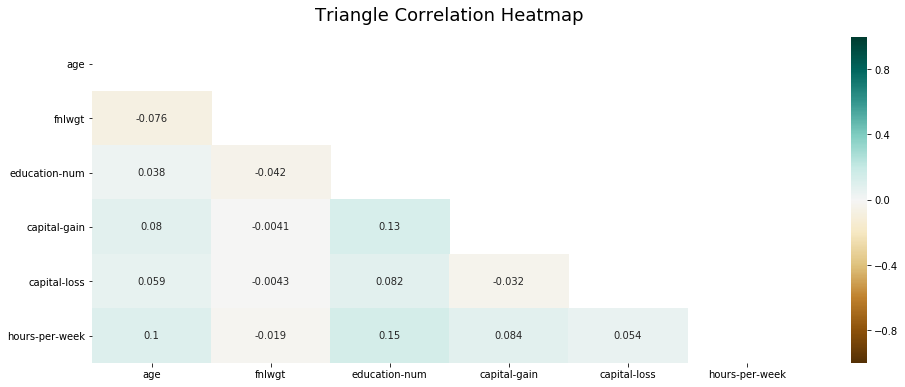

In [3]:

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
#dataframe.corr()
# plt.figure(figsize=(10,10))

# sns.heatmap(dataframe.corr(),annot=True,cmap='Blues')


In [4]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']

In [5]:
temp = list(dataframe.dtypes)
intCols, objCols = [], []
for i in range(len(temp)):
    if(temp[i] == 'O'):
        objCols.append(columns[i])
    else:
        intCols.append(columns[i])
objCols = objCols[:-1]
print("Integer Type Columns:", intCols)
print("Object Type Columns:", objCols)

Integer Type Columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Object Type Columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [6]:
# catcols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
# intcols = ['age','fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week']

# plot = pd.plotting.scatter_matrix(dataframe[intcols], figsize=[25,25])

# colors = ['red', 'green']
# plot = pd.plotting.scatter_matrix(dataframe[intCols], figsize=[25, 25], marker='x', c=dataframe.label.apply(lambda x:colors[(x)]), s=80)

In [7]:
# colors = ['red', 'green']
# plot = pd.plotting.scatter_matrix(dataframe, figsize=[25, 25], marker='x', c=dataframe.label.apply(lambda x:colors[int(x)]), s=80)

In [8]:
# for col in dataframe.columns : 
#   sns.catplot(x='label', y = col, data=dataframe)

In [9]:

# fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,20))
# fig.subplots_adjust(hspace=1)
# mosaic(dataframe, ['occupation', 'label'], ax=axes, axes_label=False)
# plt.show()


In [21]:
def emptyLabel(m):
    return ''

def createmulitvariatemosaicplots(col1, col2, col3,title):
    plt.rcParams["figure.figsize"]=(12, 10)
    mosaic(dataframe, [col1,col2,col3],
           gap=0.013, 
           label_rotation=45.0, 
           horizontal=False,
           title=title,
           labelizer=emptyLabel
          )
    plt.show()

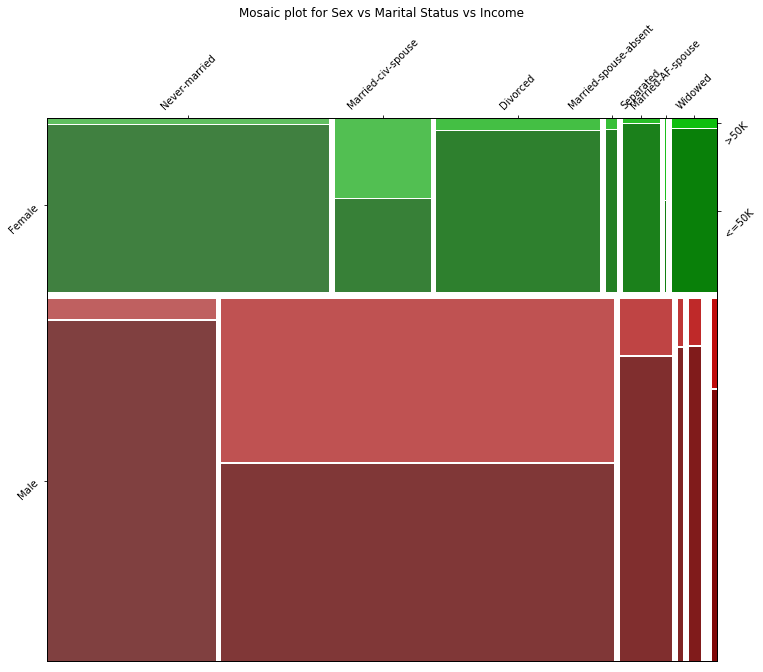

In [11]:
createmulitvariatemosaicplots('sex','marital-status','label', 'Mosaic plot for Sex vs Marital Status vs Income')

In [12]:
dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [13]:
def plot_scatter(col1, col2,dataframe,title):
        plt.rcParams["figure.figsize"]=(12, 10)
        plt.scatter(dataframe[col1], dataframe[col2], c=dataframe['label'].map({'<=50K': 'green', '>50K': 'red'}),
                               alpha=0.5)
        plt.title("Scatter plot for " + col1 + " vs " + col2)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.xticks(rotation=45)

        plt.show()
        


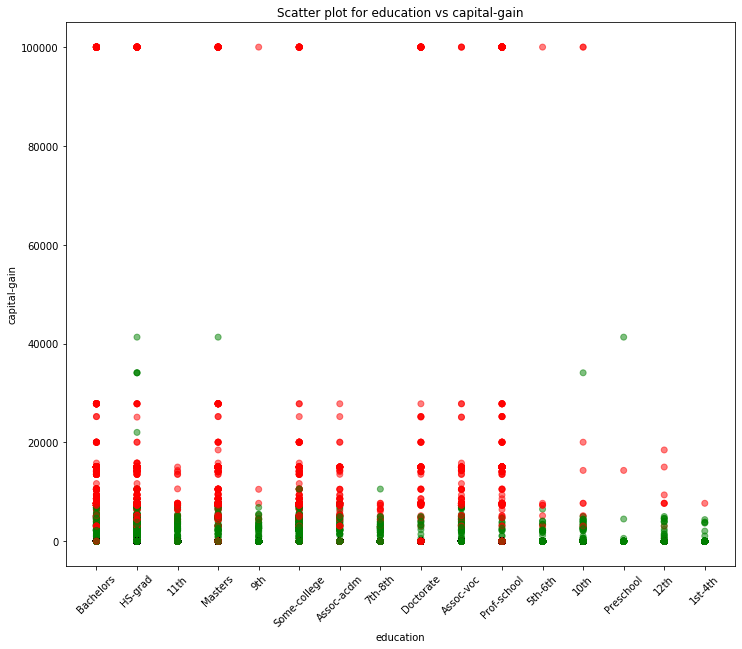

In [14]:
plot_scatter('education','capital-gain',dataframe,'Scatter plot')

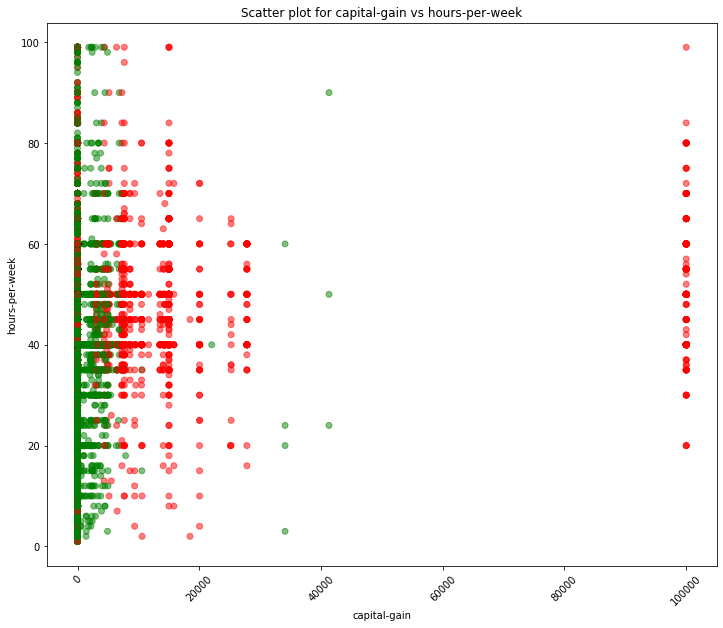

In [15]:
plot_scatter('capital-gain','hours-per-week',dataframe,'Scatter plot')

In [16]:
# sns.scatterplot(x=dataframe["age"], y=dataframe["education-num"], hue=dataframe['label'])  

# plt.show()

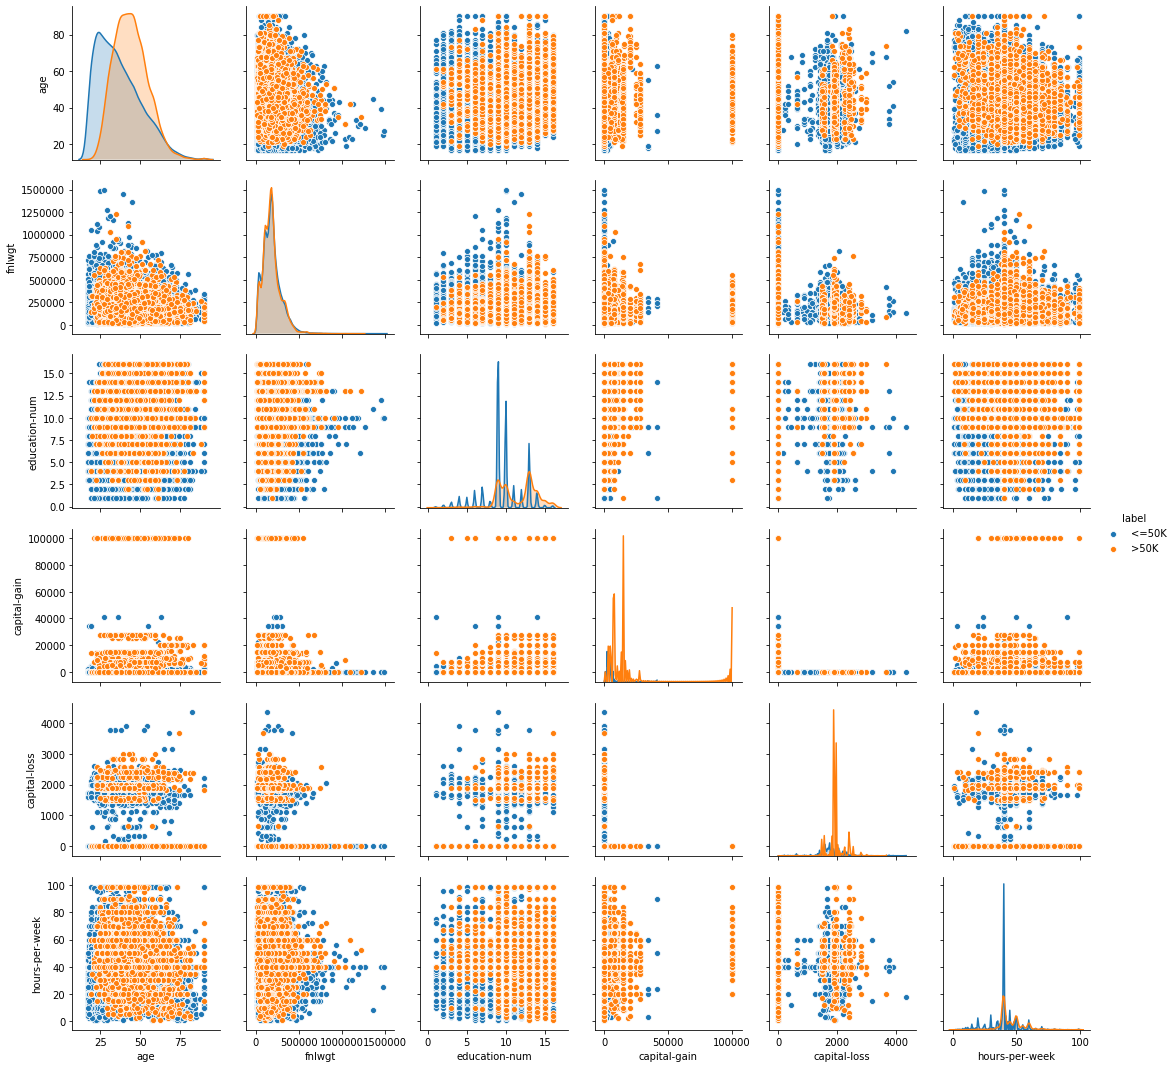

In [17]:
sns.pairplot(dataframe, hue='label')  

plt.show()


In [18]:
def craeteparallelcoordinateplot_3c(dataframe,col1, col2, col3):
    plt.rcParams['figure.dpi'] = 70
    color_val = ['#556270', '#4ECDC4']
    df_copy = dataframe[[col1, col2, col3]].copy()
    norm_df = pd.DataFrame(MinMaxScaler().fit_transform(df_copy), columns = [col1, col2, col3])
    norm_df['label'] = dataframe['label']
    df_below50k = norm_df[norm_df['label'] == "<=50K"].sample(n = 50)
    df_above50k = norm_df[norm_df['label'] == ">50K"].sample(n = 50)
    norm_df_sampled = pd.concat([df_above50k, df_below50k])
    parallel_coordinates(norm_df_sampled, class_column='label', cols=[col1, col2, col3],color = color_val)

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=1)
    plt.title('Parallel Coordinate plot for '+col1 +' vs '+col2+' vs ' +col3,fontsize=16)
    plt.show()

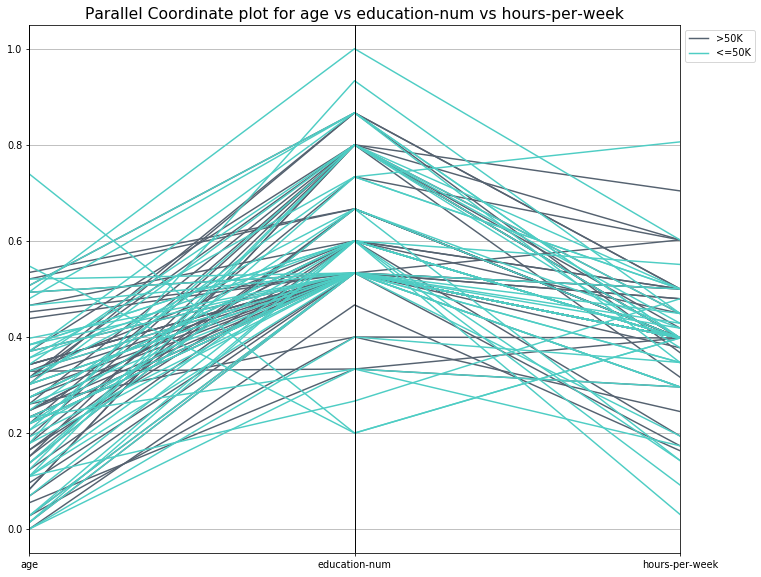

In [19]:

craeteparallelcoordinateplot_3c(dataframe,'age','education-num','hours-per-week')